# Pattern Recognition
## Ioanna Stagona



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

#SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix

# **Άσκηση 1**


In [4]:

# Get the data array
data = np.loadtxt('Data_ex1.txt', delimiter=',')

# Separate features (x1, x2) and labels
x1 = data[:,0]
x2 = data[:,1]
features = data[:, :2]
labels = data[:, 2]

#seperate features using their label
class_1_data = data[data[:, 2] == 1][:, :2]
class_2_data = data[data[:, 2] == 2][:, :2]
class_3_data = data[data[:, 2] == 3][:, :2]

### **Ερώτημα Α**

**Εκτίμηση πυκνότητας πιθανότητας με την μέθοδο Parzen**









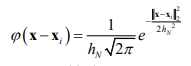

Χρησιμοποιώντας την παραπάνω συνάρτηση παραθύρου θα εκτιμήσουμε την πυκνότητα πιθανότητας σύμφωνα με τον παρακάτω τύπο :


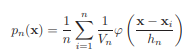


Δημιουργούμε μια συνάρτηση parzen_pdf η οποία θα πέρνει ως ορίσματα τα χαρακτηριστικά της κάθε κλάσης κάθε φορά,τα συνολικά χαρακτηριστικά, και την τιμή του μεγέθους του παραθύρου. Χρησιμοποιώντας τις τιμές των συνολικών δεδομένων δημιουργούμε ένα πλέγμα μέσα στο οποίο θα γίνει η εκτίμηση της PDF. Η χρήση αυτής της μεθόδου θα μας βοηθήσει να αποτυπώσουμε σωστά σε 3D διάγραμμα τις κατανομές πυκνότητας πιθανότητας που ζητούνται.Για κάθε σημείο στο πλέγμα, υπολογίζεται η τιμή του παρζέν παραθύρου με την βοήθεια της συνάρτησης που μας δόθηκε, η οποία εξαρτάται από την απόσταση του σημείου του πλέγματος από τα δείγματα του συνόλου δεδομένων της κάθε κλάσης. Για κάθε ένα σημείο του πλέγματος θα προκύπτει μία εκτίμηση της πυκνότητας πιθανότητας η οποία αποθηκέυεται στον πίνακα parzen_pdf. Η κλήση της συνάρτησης για συγκεκριμένο h, γίνεται 3 φορές, μία φορά για κάθε κλάση. Στην συνέχεια οι pdf συνδιάζονται σε έναν συνολικό πίνακα για την απεικόνιση των διαγραμμάτων.

In [5]:

def parzen_pdf(features,class_data, h_n):
    # Create a grid of x1 and x2 values covering the range of feature
    X1, X2 = np.meshgrid(np.linspace(features[:, 0].min(), features[:, 0].max(), 100),
                         np.linspace(features[:, 1].min(), features[:, 1].max(), 100))
    points = np.column_stack((X1.ravel(), X2.ravel()))

  #initialization
    V0 = h_n**(class_data.shape[1])
    N = len(class_data)
    parzen_pdf = np.zeros(len(points))
   # Parzen window PDF estimation
    for j in range(N):
        #Standardized distance from data point to grid points
        u = (points - class_data[j, :]) / h_n
        # Squared Euclidean distance
        norm = np.linalg.norm(u, axis=1)**2
        # Parzen window function
        parzen_window = (1 / (h_n * np.sqrt(2 * np.pi))) * np.exp(-(norm) / (2 * (h_n**2)))
        # Update PDF with contribution from each data point
        parzen_pdf += parzen_window / V0

    # Normalize the PDF by the number of samples
    parzen_pdf /= N

    return X1, X2, parzen_pdf

Κλήση της συνάρτησης

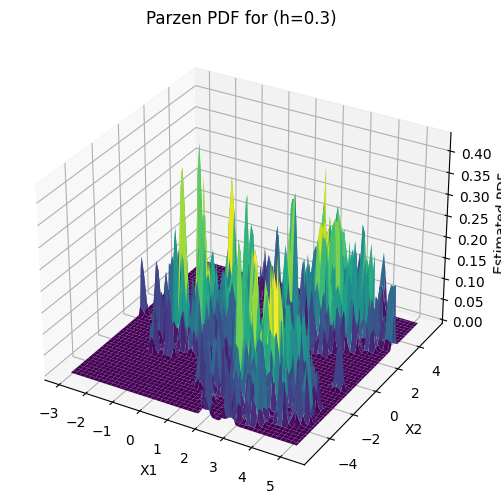

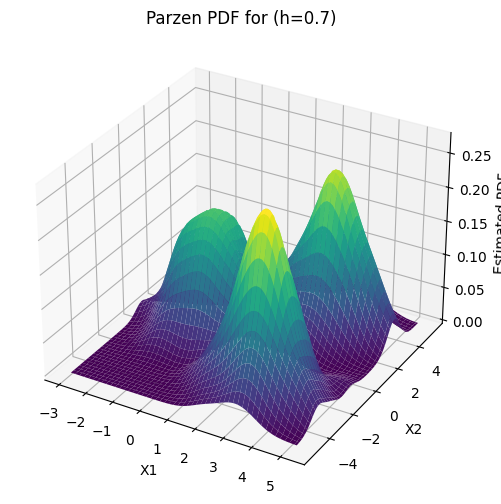

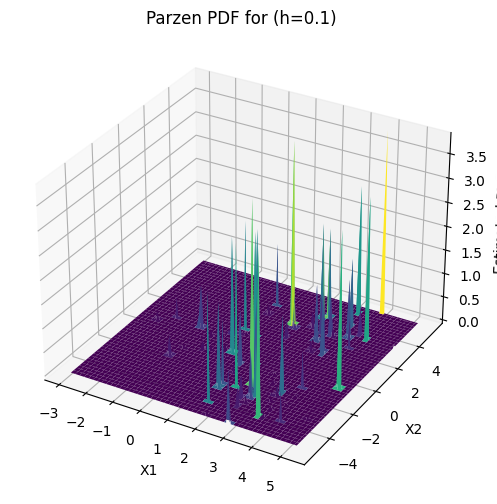

In [6]:
#3 different bandwith va;lues
h_n_values = [0.3, 0.7, 0.1]

for h in h_n_values:
    # Parzen PDF function call
    #x1:feature space for x1, same for every class
    #x2:feature space for x2, same for every class
    x1,x2,parzen_pdf1 = parzen_pdf(features, class_1_data, h)
    parzen_pdf2 = parzen_pdf(features, class_2_data, h) [2]
    parzen_pdf3 = parzen_pdf(features, class_3_data, h) [2]


    # Combine the PDFs for plotting
    combined_pdf = np.max(np.stack((parzen_pdf1, parzen_pdf2, parzen_pdf3)), axis=0)

    # Create a plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot
    ax.plot_surface(x1, x2, combined_pdf.reshape(x1.shape), cmap='viridis')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Estimated PDF')
    ax.set_title(f'Parzen PDF for (h={h})')

    plt.show()

**Συμπεράσματα από τα διαγράμματα**

Στη μέθοδο παράθυρου Parzen, το h χρησιμοποιείται σαν παράμετρος για τον καθορισμό του πλάτους του παραθύρου που τοποθετείται γύρω από κάθε δείγμα κατά τον υπολογισμό της πυκνότητας πιθανότητας. Η παράμετρος αυτή επιδρά και στο πλάτος αλλά και στο μέτρο του παραθύρου.Όσο μεγαλύτερο το h, τόσο μεγαλύτερο το παράθυρο, και αντίστροφα.Από την αποτύπωση των πυκνοτήτων πιθανότητας για διαφορετικές τιμές του h παρατηρούμε ότι όσο πιο μικρό είναι, τόσο μεγαλύτερη είναι η διασπορά και η εκτίμηση της πυκνότητας πιθανότητας αποκτά περισσότερη λεπτομέρεια κοντά στα δείγματα, αλλά είναι πιο θορυβώδης(πολλές κοφτερές και απότομες κορυφές) και ευαίσθητη στην τυχαιότητα των δεδομένων.Όπως φαίνεται έντονα απο το 3ο διάγραμμα, η απόκριση της εκτίμησης της PDF θα είναι πολύ υψηλή κοντά στα σημεία εκπαίδευσης και θα μειώνεται πολύ γρήγορα και απότομα όσο απομακρύνεται το **x** απο αυτά.
Μεγαλύτερες τιμές του h μας οδηγούν σε πιο ομαλές εκτιμήσεις , αλλά με μειωμένη ακρίβεια της προσέγγισης, καθώς η εκτίμηση γίνεται πολύ μεροληπτικά.
Θεωρώ πως η καλύτερη εκτίμηση γίνεται με το hN=0.3 . Φαίνεται να έχει την πιο ισορροπημένη συμπεριφορά ανάμεσα στα 3, καθώς έχει μεγαλύτερη λεπτομέρια απο τη δέυτερη περίπτωση, και ταυτόχρονα δεν είναι τόσο απόλυτη και ευαίσθητη στον θόρυβο όσο η 3η.


**Εάν πετάξω το 75% των δεδομένων**

Σε αυτή την περίπτωση θα πετάξω το 75% των δεδομένων μου με σκοπώ να εξάγω καινούργια συμπεράσματα για τον ρόλο του πλήθους των data, για σταθερό h. Βάζουμε ένα seed, τυπικά με τον αριθμό 42, για επαναληψιμότητα των αποτελεσμάτων.

In [7]:
# Set the seed for reproducibility
np.random.seed(42)

# Shuffle the data randomly
np.random.shuffle(data)

# Calculate the number of samples to keep
percentage_to_keep = 0.25  # Keeping 25% of the data
num_samples_to_keep = int(len(data) * percentage_to_keep)

# Keep only the specified percentage of the data
lim_data = data[:num_samples_to_keep, :]

# Classification - separate the data into three classes based on the third column
lim_class_1_data = lim_data[lim_data[:, 2] == 1][:, :2]  # Class 1 data
lim_class_2_data = lim_data[lim_data[:, 2] == 2][:, :2]  # Class 2 data
lim_class_3_data = lim_data[lim_data[:, 2] == 3][:, :2]  # Class 3 data

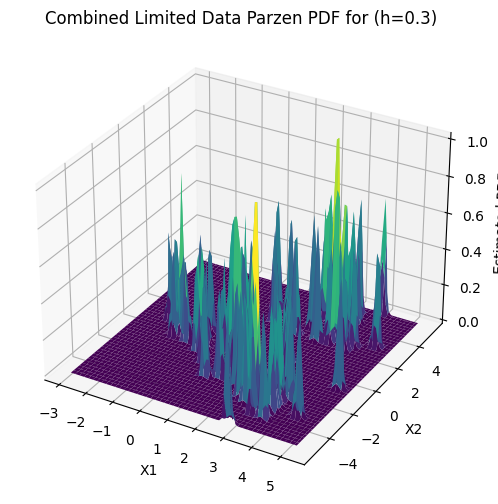

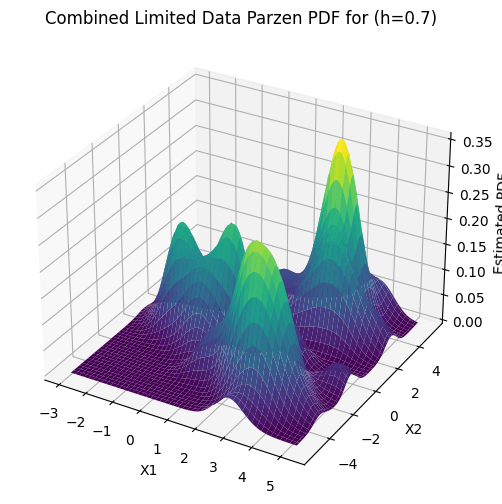

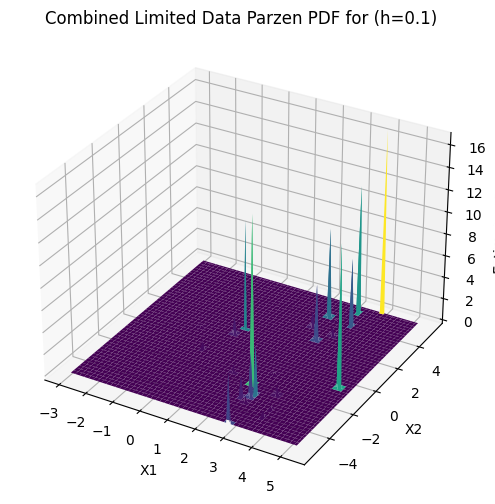

In [25]:

# Define bandwidth values for Parzen window estimation
h_n_values = [0.3, 0.7, 0.1]

for h in h_n_values:
    # Calculate Parzen window PDF for each class with limited data
    lim_X1, lim_X2, lim_parzen_pdf1 = parzen_pdf(features, lim_class_1_data, h)# PDF for class 1
    lim_parzen_pdf2 = parzen_pdf(features, lim_class_2_data, h)[2]  # PDF for class 2
    lim_parzen_pdf3 = parzen_pdf(features, lim_class_3_data, h)[2]  # PDF for class 3

    # Combine the PDFs from the three classes by taking the maximum value at each point
    combined_lim_pdf = np.max(np.stack((lim_parzen_pdf1, lim_parzen_pdf2, lim_parzen_pdf3)), axis=0)

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the combined estimated PDF on the surface
    ax.plot_surface(lim_X1, lim_X2, combined_lim_pdf.reshape(lim_X1.shape), cmap='viridis')

    # Set labels and title for the plot
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Estimated PDF')
    ax.set_title(f'Combined Limited Data Parzen PDF for (h={h})')

    plt.show()

**Συμπεράσματα**

Κρατώντας σταθερό το h η διασπορά αυξάνεται όσο το πλήθος των σημείων μειώνεται. Αυτό συμβαίνει γιατί η πυκνότητα του χώρου μειώνεται σε κάποια σημεία και έτσι οι αιχμηρές συναρτήσεις , τα παράθυρα, είναι τοποθετημένα πιο μακρυά μεταξύ τους.Αυτό μπορεί να οδηγήσει σε υπερβολική ευαισθησία στα τοπικά χαρακτηριστικά των δεδομένων, καθιστώντας την εκτίμηση πιθανότητας ευάλωτη στον θόρυβο και σε τυχαίες αποκλίσεις.

**Επιλογή κατάλληλου μεγέθους παραθύρου**

Εαν υποθέσουμε ότι η σχέση του πλήθους των δειγμάτων με το μέγεθος του παραθύρου είναι γραμμική, τότε μπορούμε να χρησιμοποιήσουμε την αναλογία αυτή για να αυξήσουμε το h όταν έχουμε λιγότερα δείγματα και να διατηρήσουμε μια παρόμοια λεπτομέρεια στην εκτίμηση της πυκνότητας πιθανότητας.Συνεπώς, αφού χρησιμοποιούμε 75% λιγότερα δείγματα, το hN θα πρέπει να αυξηθεί κατα 25% (hN' = hN / 0.75).

Άρα οι καινούργιες τιμές του hN =[0.375, 0.875, 0.125]

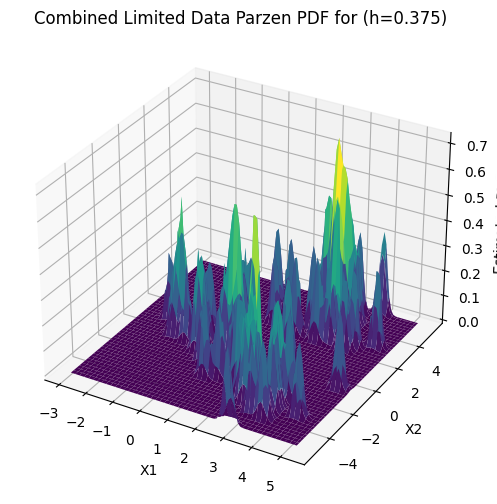

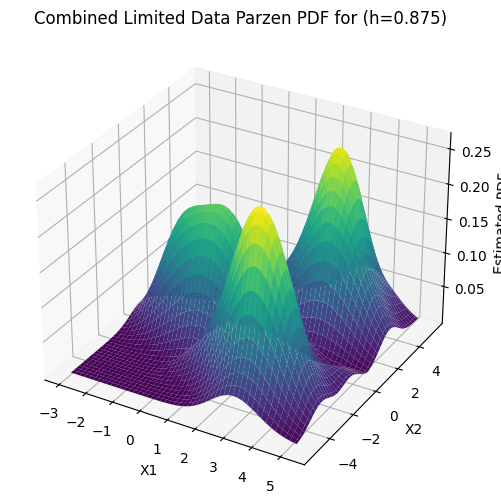

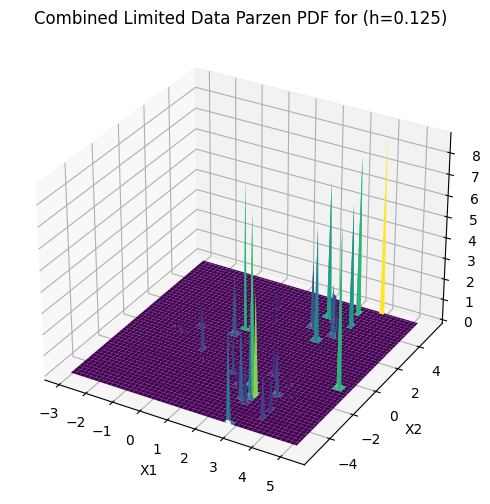

In [26]:
# Define bandwidth values for Parzen window estimation
h_n_values = [0.375, 0.875, 0.125]

for h in h_n_values:
    # Calculate Parzen window PDF for each class with limited data
    lim_X1, lim_X2, lim_parzen_pdf1 = parzen_pdf(features, lim_class_1_data, h)# PDF for class 1
    lim_parzen_pdf2 = parzen_pdf(features, lim_class_2_data, h)[2]  # PDF for class 2
    lim_parzen_pdf3 = parzen_pdf(features, lim_class_3_data, h)[2]  # PDF for class 3

    # Combine the PDFs from the three classes by taking the maximum value at each point
    combined_lim_pdf = np.max(np.stack((lim_parzen_pdf1, lim_parzen_pdf2, lim_parzen_pdf3)), axis=0)

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the combined estimated PDF on the surface
    ax.plot_surface(lim_X1, lim_X2, combined_lim_pdf.reshape(lim_X1.shape), cmap='viridis')

    # Set labels and title for the plot
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Estimated PDF')
    ax.set_title(f'Combined Limited Data Parzen PDF for (h={h})')

    plt.show()

Πράγματι, παρατηρούμε ότι η υπόθεση μας ήταν σωστή καθώς οι εκτιμήσεις των PDF φαίνεται να είναι ιδιαίτερα κοντινές απο άποψη λεπτομέριας στην απεικόνιση. Οι τιμές των PDF είναι πιο υψηλές απο τις αρχικές όπως ήταν αναμενόμενο, αφού διαθέτουμε λιγότερα δείγματα.


### **Ερώτημα Β**

Στην προηγούμενη περίπτωση με την μέθοδο parzen,o όγκος γύρω απο τα σημεία **x** θεωρήθηκε σταθερός, ενώ το πλήθος των σημέιων στο εσωτερικό του ήταν τυχαίο απο σημείο σε σημείο. Στην εκτίμηση της πυκνότητας πιθανότητας με την μέθοδο του πλησιέστερου γείτονα, το πλήθος των σημέιων k θα είναι σταθερό, ενώ ο όγκος του παραθύρου θα διαμορφώνεται ώστε να συμπεριλαμβάνει τα k σημεία. Έτσι σε περιοχές του χώρου μικρής πυκνότητας ο όγκος θα είναι μεγάλος, ενώ σε περιοχές υψηλής πυκνότητας θα είναι μικρός. Η πυκνότητα πιθανότητας υπολογίζεται σύμφωνα με τον παρακάτω τύπο.



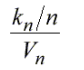



Για κάθε **x** δημιουργείται ένας κύκλος που περικλύει τους k κοντινότερους γείτονες της κάθε κλάσης, με ακτίνα ίση με την απόσταση από το σημείο που είναι πιο απομακρυνσμένο. Έπειτα χρησιμοποιώντας την παραπάνω ακτίνα υπολογίζουμε το εμβαδόν (όγκο) του κάθε κύκλου με τον τύπο **V=πρ^2** .



In [10]:
def knn_pdf(features, class_data, k):
    # Create a grid of x1 and x2 values covering the range of features
    X1, X2 = np.meshgrid(np.linspace(features[:, 0].min(), features[:, 0].max(), len(class_data)),
                         np.linspace(features[:, 1].min(), features[:, 1].max(), len(class_data)))
    points = np.column_stack((X1.ravel(), X2.ravel()))
    N = len(points)
    # Initialize PDF array
    pdf = np.zeros(N)

    # Calculate the PDF for each point in the grid
    for i in range(N):
        # Calculate distances from the point to all points in class_data
        distances = np.sqrt(np.sum((points[i, :] - class_data) ** 2, axis=1))
        # Sort the distances
        sorted_distances = np.sort(distances)
        # Select k closest neighbors
        k_closest_neighbours = sorted_distances[:k]
        # Distance to the k-th nearest neighbor
        r = np.max(k_closest_neighbours)
        # Volume of the circle with radius r
        v = np.pi * (r**2)
        # Compute PDF value
        pdf[i] = k / (v * N)

    pdf = pdf.reshape(X1.shape)  # Reshape PDF to match the grid shape
    return X1, X2, pdf



Για σταθερό αριθμό γειτόνων,καλούμε την συνάρτηση knn_pdf 3 φορές, μία φορά για κάθε κλάση. Κάθε φορά η ακτίνα, ο όγκος και άρα η εκτίμιση της pdf προσαρμόζεται στα δεδομένα της εκάστοτε κλάσης. Τέλος όπως και προηγουμένως συνδιάζουμε σε έναν συγκεντρωτικό πίνακα τις εκτιμίσεις πυκνότητας πιθανότητας για την αποτύπωση τους σε κοινό διάγραμμα.

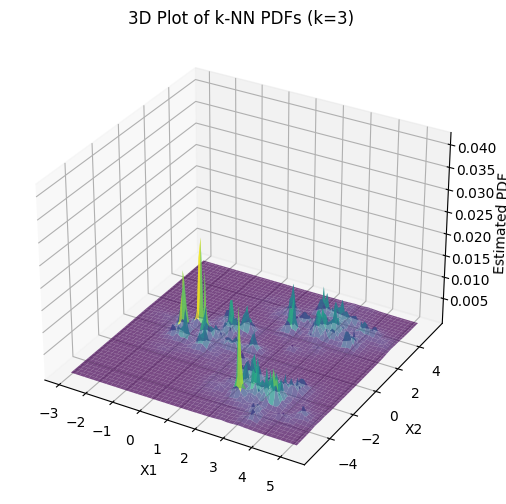

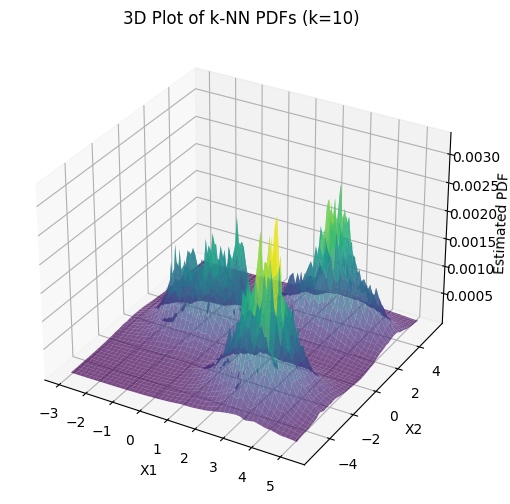

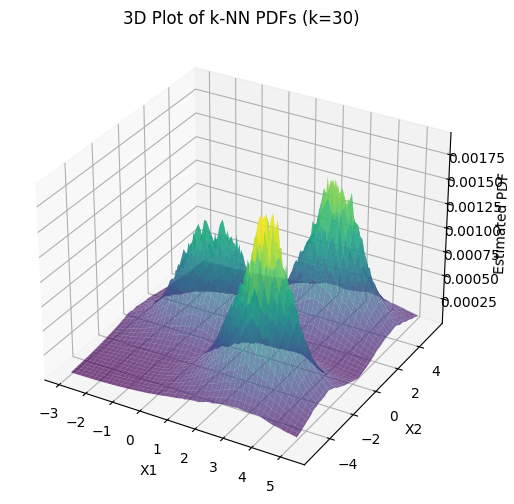

In [11]:

# Define k values for the k-NN algorithm
k_values = [3, 10, 30]

for k in k_values:
    # Calculate the k-NN PDF for each class
    X1, X2, knn_pdf_class_1 = knn_pdf(features, class_1_data, k)
    knn_pdf_class_2 = knn_pdf(features, class_2_data, k)[2]
    knn_pdf_class_3 = knn_pdf(features, class_3_data, k)[2]

    # Combine the PDFs from the three classes
    combined_knn_pdf = np.max(np.stack((knn_pdf_class_1, knn_pdf_class_2, knn_pdf_class_3)), axis=0)

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the combined estimated PDFs
    ax.plot_surface(X1, X2, combined_knn_pdf, cmap='viridis', alpha=0.7)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Estimated PDF')
    ax.set_title(f'3D Plot of k-NN PDFs (k={k})')
    plt.show()

**Συμπεράσματα από τα διαγράμματα**

**Για k=3**: Οι κορυφές της εκτιμώμενης πυκνότητας πιθανότητας είναι πολύ ψηλές και αιχμηρές, δείχνοντας ότι μικρές περιοχές με υψηλή συγκέντρωση δεδομένων έχουν μεγάλη επιρροή στην εκτίμηση της πυκνότητας. Υπάρχει μεγάλη λεπτομέρια στην εκτίμηση ωστόσο γίνεται αντιληπτό ότι ο αλγόριθμος είναι αρκετά ευαίσθητος σε θόρυβο ή outliers στα δεδομένα.

**Για k=10**: Οι περιοχές αυξημένης πυκνότητας είναι λιγότερο αιχμηρές και πιο εξομαλυμένες. Η αυξημένη τιμή του k οδηγεί σε μία πιο γενικευμένη εκτίμηση που δεν επηρεάζεται τόσο εύκολα , μειώνοντας έτσι τον θόρυβο στην εκτίμηση.

**Για k=30**: Τα διαγράμματα παρουσιάζουν ακόμη πιο ήπιες και εξομαλυμένες περιοχές πυκνότητας. Οι περιοχές αυτές φαίνεται να συγχωνεύονται, πράγμα που υποδηλώνει ότι ο αλγόριθμος λαμβάνει υπόψη μεγαλύτερες περιοχές του χώρου  για να κάνει τις εκτιμήσεις του. Αυτό μπορεί να μειώσει την ευαισθησία στον τοπικό θόρυβο και να βελτιώσει την ικανότητα γενίκευσης, αλλά επίσης υπάρχει ο κίνδυνος η ακρίβεια τις προσέγγισης να είναι μειωμένη λόγω της μεροληπτικής δράσης του αλγορίθμου.

Καλύτερη εκτίμηση φαίνεται να επιτιγχάνεται με την επιλογή 10 πλησιιέστερων γειτόνων καθώς φαίνεται να είναι πιο ανεκτική σε θόρυβο και outliers χωρίς όμως να γίνεται γενίκευση σε βαθμό που χάνονται σημαντικές πληροφορίες απο τα τοπικά χαρακτηριστικά.

### **Ερώτημα Γ**

Η παρακάτω συνάρτηση εφαρμόζει τον Μπεϊζιανό κανόνα απόφασης για ταξινόμηση δεδομένων σε τρεις κλάσεις. Η ταξινόμηση βασίζεται σε εκτιμήσεις πυκνοτήτων πιθανότητας που έχουν υπολογιστεί με τη μέθοδο Parzen Window . Η κλάση που αποδίδεται σε κάθε σημείο **x** αντιστοιχεί στην κλάση που διαθέτει την μεγαλύτερη τιμή της εκ των υστέρων πιθανότητας.

*Παρατήρηση : Στην υλοποίηση της συνάρτησης προσθέτουμε μια μικρή τιμή στο άθροισμα των εκ των υστέρων πιθανοτήτων , κάτι που αποτρέπει τη διαίρεση με το μηδέν χωρίς να επηρεάζει σημαντικά το αποτέλεσμα της ταξινόμησης*



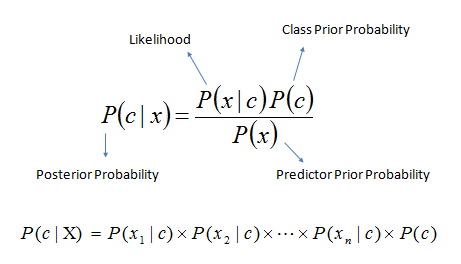

In [12]:
def bayes_decision_rule(class_pdfs, apriori_probs):
    # Convert the class PDFs and apriori probabilities to NumPy arrays
    class_pdfs = np.array(class_pdfs)
    apriori_probs = np.array(apriori_probs)

    # Compute the posterior probabilities using Bayes' rule
    posterior_probs = class_pdfs * apriori_probs[:, np.newaxis]

    # Add a small constant to avoid division by zero
    epsilon = 1e-10
    posterior_probs /= np.sum(posterior_probs, axis=0) + epsilon

    # Classify based on the maximum posterior probability
    predicted_labels = np.argmax(posterior_probs, axis=0) + 1  # Add 1 to start labels from 1

    return predicted_labels

Κλήση της παραπάνω συνάρτησης για την προσθήκη ετικετών στα σημεία του χώρου και απεικόνηση των αποτελεσμάτων.

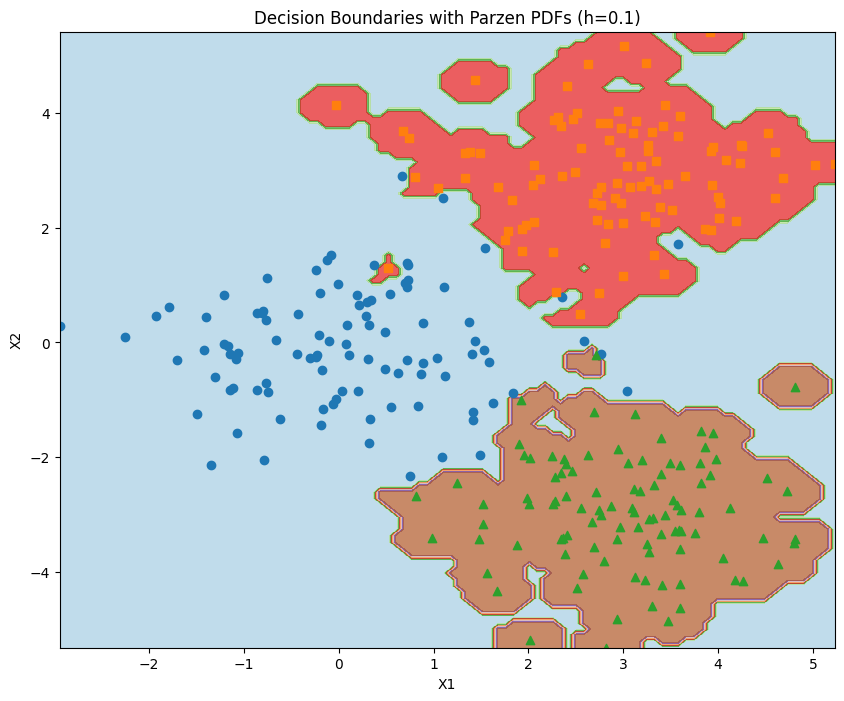

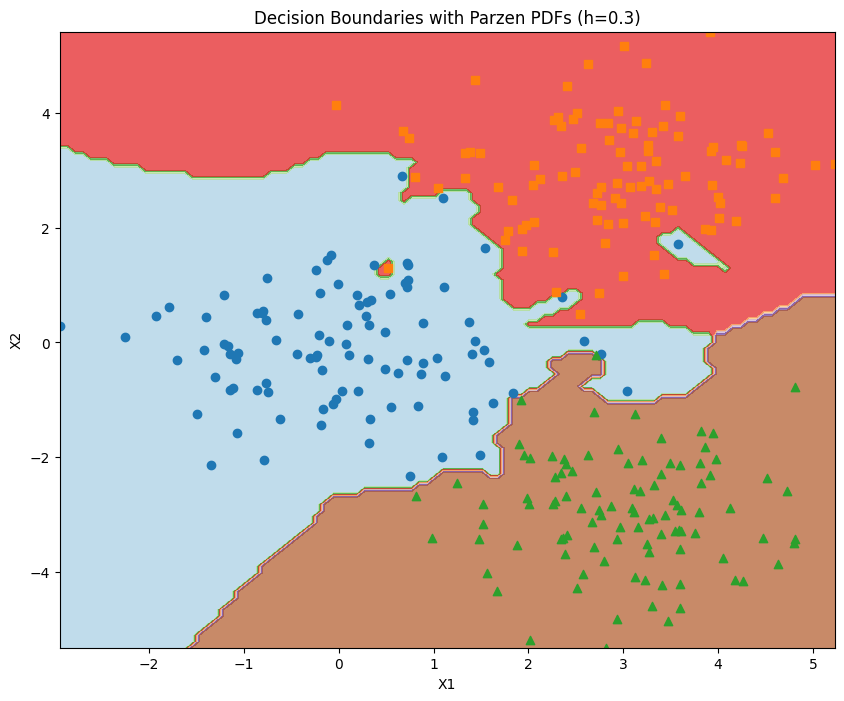

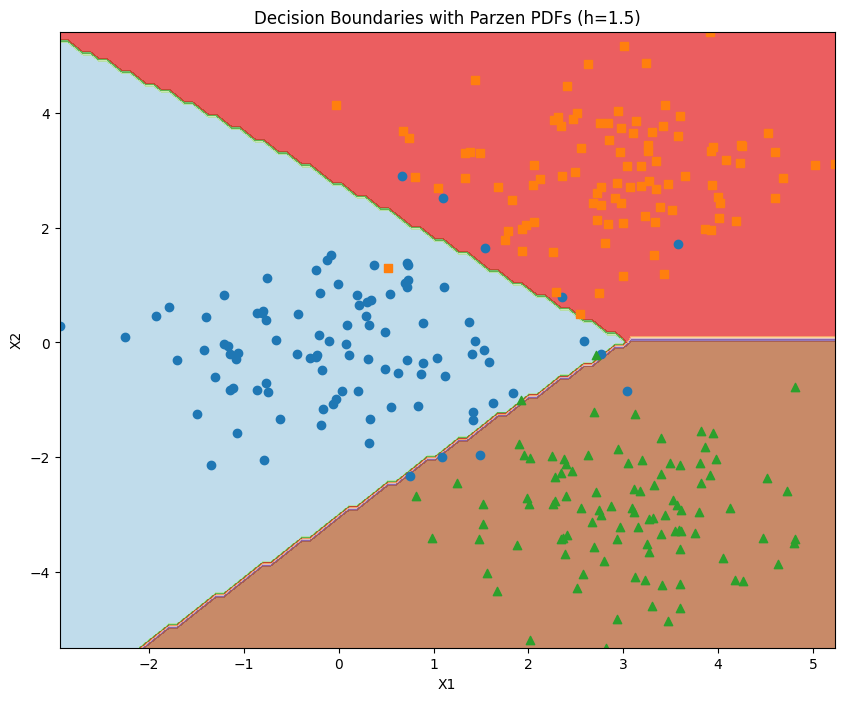

In [28]:
h_values = [0.1, 0.3, 1.5]  # bandwidth values
apriori_probs = [1/3, 1/3, 1/3] #apriori probs

for h in h_values:
    X1,X2,pdf_estimate_class_1 = parzen_pdf(features,class_1_data, h)
    pdf_estimate_class_2 = parzen_pdf(features,class_2_data, h)[2]
    pdf_estimate_class_3 = parzen_pdf(features,class_3_data, h)[2]


    # Apply Bayes decision rule in class PDF's
    decision_result = bayes_decision_rule([pdf_estimate_class_1, pdf_estimate_class_2, pdf_estimate_class_3], apriori_probs)

    # Reshape the decision result
    decision_result = decision_result.reshape(X1.shape)

    # Plot the decision boundaries and data points
    plt.figure(figsize=(10, 8))
    plt.contourf(X1, X2, decision_result,cmap='Paired', alpha=0.7)

    # Scatter plot the data points
    plt.scatter(class_1_data[:,0], class_1_data[:,1], label='Class 1', marker='o')
    plt.scatter(class_2_data[:,0], class_2_data[:,1], label='Class 2', marker='s')
    plt.scatter(class_3_data[:,0], class_3_data[:,1], label='Class 3', marker='^')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Decision Boundaries with Parzen PDFs (h={h})')
    plt.show()

**Συμπεράσματα από τα διαγράμματα**


**Για h=0.1**: Το διάγραμμα δείχνει πολλές μικρές και απομονωμένες περιοχές απόφασης, που σημαίνει ότι η εκτίμηση της πυκνότητας είναι πολύ ευαίσθητη στα δεδομένα εκπαίδευσης.Τα όρια απόφασης που παράγονται είναι πολύ ανακριβή και επιρρεπή σε υπερπροσαρμογή, πράγμα που μπορεί να οδηγήσει σε κακή απόδοση του μοντέλου σε νέα, αδιάκριτα δεδομένα

**Για h=0.3**: Τα όρια απόφασης φαίνονται πιο συνεχή και  ομαλά, δείχνοντας μια καλύτερη ισορροπία ανάμεσα στην ακρίβεια και την ομαλότητα. Παρέχει μια πιο γενικευμένη εκτίμηση που μπορεί να μειώνει τον θόρυβο, αλλά διατηρεί ακόμα λεπτομερή διαχωρισμό μεταξύ των κλάσεων.

**Για h=1.5** :Τα όρια απόφασης είναι ακόμη πιο ομαλά και ευρεία, με τις περιοχές απόφασης για κάθε κλάση να φαίνονται να συγχωνεύονται περισσότερο. Αυτό υποδηλώνει μια σημαντική γενίκευση, όπου η ευαισθησία στα συγκεκριμένα δεδομένα μειώνεται και η εκτίμηση της πυκνότητας γίνεται λιγότερο ακριβής σε τοπικό επίπεδο.

Συνοψίζοντας, η παράμετρος h ελέγχει την ομαλότητα των εκτιμήσεων πυκνότητας και των περιοχών απόφασης. Μικρές τιμές του h μπορεί να προκαλέσουν υπερβολική προσαρμογή στα δεδομένα, ενώ μεγάλες τιμές μπορεί να οδηγήσουν σε υπερβολική γενίκευση. Η εύρεση της βέλτιστης τιμής για το h απαιτεί ισορροπία μεταξύ της ακρίβειας τοπικών προβλέψεων και της ανθεκτικότητας στον θόρυβο.







### **Ερώτημα Δ**

Παρακάτω παρουσιάζεται η συνάρτηση που υλοποιεί την ταξινόμηση των δεδομένων με την χρήση του k-NN. Eφαρμόζει τον αλγόριθμο k-Nearest Neighbors σε ένα πλέγμα σημείων που ορίζεται στο χώρο των δύο διαστάσεων των χαρακτηριστικών X1 και X2. Στοχεύει να κατηγοριοποιήσει κάθε σημείο του πλέγματος με βάση τις κλάσεις των k πλησιέστερων δειγμάτων σε αυτό. Συγκεκριμένα , ο αλγόριθμος για κάθε δείγμα στον χώρο υπολογίζει τις ευκλείδειες αποστάσεις από όλα τα χαρακτηριστικά,τις ταξινομεί και βρίσκει τους δείκτες στον πινακα αποστάσεων των k πλησιέστερων γειτόνων.Λαμβάνει τις κλάσεις του καθενός και καταμετρά πόσες φορές εμφανίζεται κάθε κλάση μεταξύ τους.Τέλος, αναθέτει στο δείγμα την κλάση με τον μεγαλύτερο αριθμό εμφανίσεων ανάμεσα στους k γείτονες.

In [14]:
def k_nn(features, data, k):
    # Define the grid for visualization
    X1, X2 = np.meshgrid(np.linspace(features[:, 0].min(), features[:, 0].max(), 100),
                         np.linspace(features[:, 1].min(), features[:, 1].max(), 100))
    points = np.column_stack((X1.ravel(), X2.ravel()))

    predictions = np.zeros(points.shape[0])
    for i in range(points.shape[0]):
        # Calculate distances from each point to all data points
        distances = np.sqrt(np.sum((points[i, :] - data[:, :2]) ** 2, axis=1))
        # Get indices of k nearest neighbors
        sorted_indices = np.argsort(distances)[:k]
        # Get the classes of these neighbors
        k_nearest_classes = data[sorted_indices, -1]
        # Count the number of instances of each class among the k neighbors
        class_counter = np.bincount(k_nearest_classes.astype(int))
        # Assign the class with the highest count to the prediction
        predictions[i] = np.argmax(class_counter)

    return X1, X2, predictions

Kλήση της συνάρτησης, κατηγοριοποίηση και αποτύπωση αποτελεσμάτων.

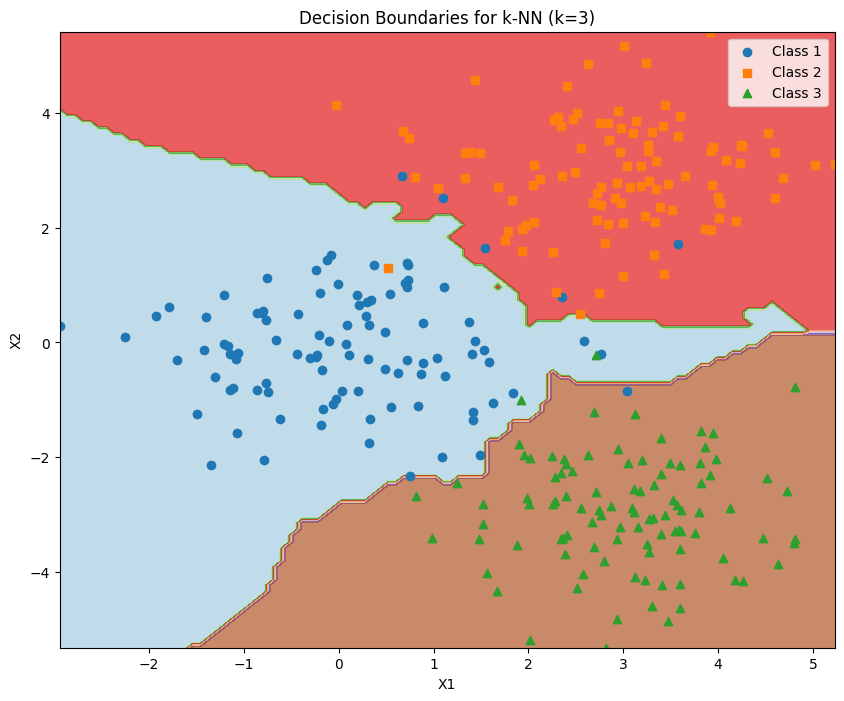

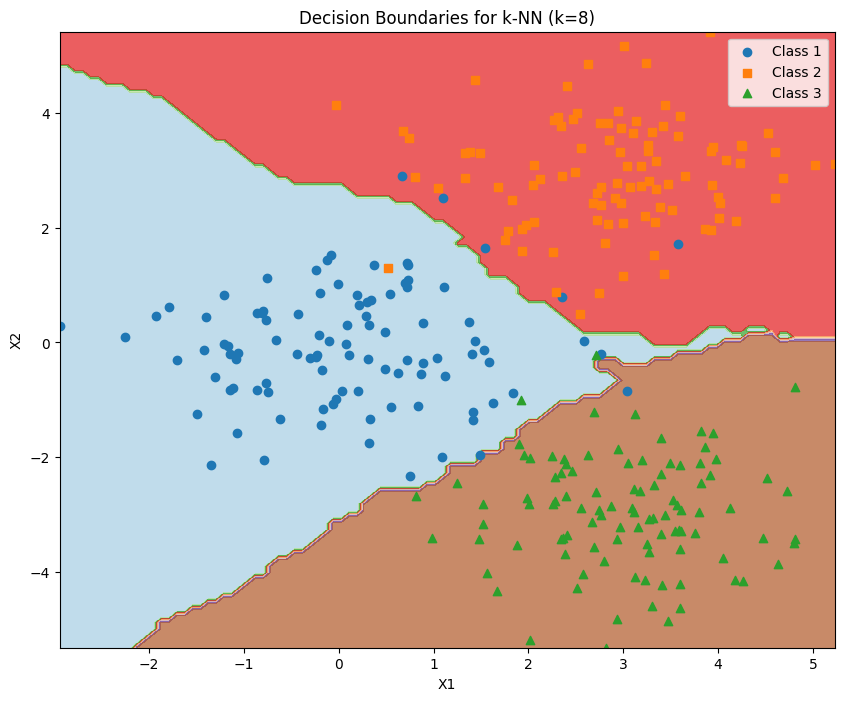

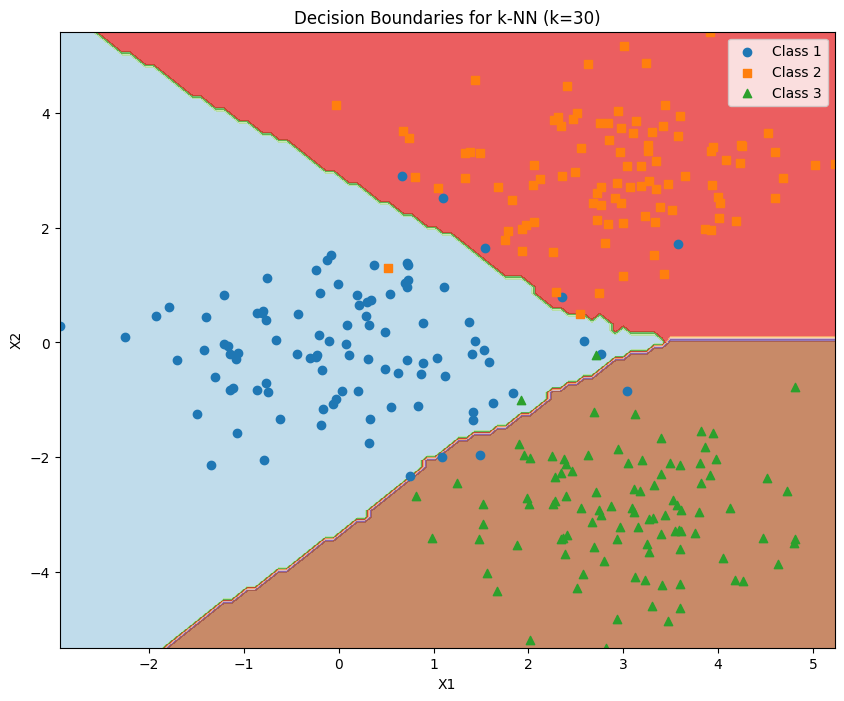

In [15]:
# Define k values for k-NN classification
k_values = [3, 8, 30]

for  k in (k_values):

    # Apply k-NN algorithm to mesh data
    X1,X2,Z = k_nn(features,data, k)
    # Reshape the output for contour plot
    Z = Z.reshape(X1.shape)

   # Plot decision boundaries for different k values
    plt.figure(figsize=(10, 8))
    plt.contourf(X1, X2, Z, cmap='Paired', alpha=0.7)

    # Scatter plot of data points
    plt.scatter(class_1_data[:,0], class_1_data[:,1], label='Class 1', marker='o')
    plt.scatter(class_2_data[:,0], class_2_data[:,1], label='Class 2', marker='s')
    plt.scatter(class_3_data[:,0], class_3_data[:,1], label='Class 3', marker='^')

    # Plot settings
    plt.title(f'Decision Boundaries for k-NN (k={k})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()


**Συμπεράσματα**


**Για k=3**: τα όρια απόφασης φαίνονται να έχουν πολλές ακανόνιστες αλλαγές, γεγονός που υποδηλώνει πιθανή
υπερ-προσαρμογή (overfitting) στα δεδομένα εκπαίδευσης. Ο αλγόριθμος είναι πολύ ευαίσθητος στον θόρυβο και σε outliers του συνόλου δεδομένων. Αυτο συμβαίνει διότι οι γείτονες που καθορίζουν την κλάση του εκάστοτε σημείου είναι πολύ λίγοι σε σχέση με τα συνολικά δεδομένα και πιθανώς όχι αντιπροσωπευτικοί.

**Για k=8**: τα όρια απόφασης είναι λιγότερο τραχιά και πιο ομαλοποιημένα σε σύγκριση με την περίπτωση k=3, δείχνοντας μια καλύτερη γενίκευση στην απόφαση ταξινόμησης.

**Για k=30**: οι οριακές γραμμές απόφασης έχουν γίνει ακόμη πιο ομαλές, υποδηλώνοντας ένα υψηλό επίπεδο γενίκευσης. Αυτό μπορεί να οδηγήσει σε υπο-προσαρμογή (underfitting), όπου ο αλγόριθμος αγνοεί μικρότερες αλλά σημαντικές διακυμάνσεις στα δεδομένα.

Από τα αποτελέσματα αυτά μπορεί να συμπερανθεί ότι ένα μικρό k μπορεί να οδηγήσει σε μοντέλο που ταιριάζει πολύ στενά στα δεδομένα εκπαίδευσης, ενώ ένα πολύ μεγάλο k μπορεί να οδηγήσει σε υπερβολική γενίκευση, αγνοώντας τις λεπτομέρειες και τις δομές εντός των δεδομένων. Kαλύτερη και πιο ισορροπημένη αποτύπωση φαίνεται να δίνει η επιλογή των 10 πλησιέστερων γειτόνων.

# **Άσκηση 2**



## **Eρώτημα Α**

 Ο αλγόριθμος του Perceptron είναι ένας γραμμικός ταξινομητής, που σημαίνει ότι κάνει προβλέψεις με βάση μια γραμμική συνάρτηση των εισόδων. Στόχος του είναι να βρει ένα υπερεπίπεδο που διαχωρίζει τα δείγματα σε δύο κατηγορίες. Ο αλγόριθμος διορθώνει τα βάρη βάσει των λαθών προβλέψεων, προσπαθώντας συνεχώς να μειώσει τον αριθμό των λανθασμένα ταξινομημένων δειγμάτων.
 Τα βάρη ανανεώνονται χρησιμοποιώντας τον παρακάτω τύπο.


 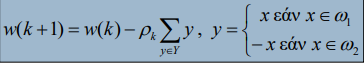


 Στην περίπτωση μας έχουμε επιλέξει ως 1 τις ετικέτες της κλάσης ω1 και -1 τις τικέτες της κλάσεις ω2.

Προσθέτοντας στο w[k] το άθροισμα των λάθος ταξινομημένων δεδομένων τότε το w[k+1] θα μετακινήσει το υπερεπίπεδο προς τα λάθος Y έτσι ώστε σιγά σιγά να τα συμπεριλάβει στην σωστή κλάση.  O αλγόριθμος σταματά όταν βρει ένα υπερεπίπεδο που διαχωρίζει γραμμικά τις 2 κλάσεις, επιτυγχάνοντας τον στόχο της διαχωρισιμότητας.

In [16]:
def batch_perceptron(X, y, rho, max_iter):

    N, d = X.shape
    # Initialize the weights vector with zeros,one extra ddimension for the bias
    w = np.zeros(d + 1)

    # Initializing
    iter_count = 0
    mis_clas = N
    costs = []

    # Add a column of ones to X to account for the bias term
    X_bias = np.hstack((np.ones((N, 1)), X))

    # Iterate until there are no misclassified samples or the max iterations are reached
    while mis_clas != 0 and iter_count < max_iter:
        iter_count += 1
        mis_clas = 0
        gradient = np.zeros(d + 1)
        for i in range(N):
            # If the sample is misclassified, update the gradient and misclassified count
            if y[i] * np.dot(X_bias[i], w) <= 0:
                mis_clas += 1
                gradient -= rho * y[i] * X_bias[i]

        # Update the weights vector
        w -= rho * gradient

        # Record the number of misclassified points in this iteration
        costs.append(mis_clas)
        if iter_count == 1:
            print(f'First Iteration: #Misclassified points = {mis_clas}')

    # Return the final weights, iteration count, final misclassified count, and cost history
    return w, iter_count, mis_clas, costs

First Iteration: #Misclassified points = 300
Weights: [-4.02       -9.68724989 -7.63710077]
Number of iterations: 143
Final number of misclassified points: 0


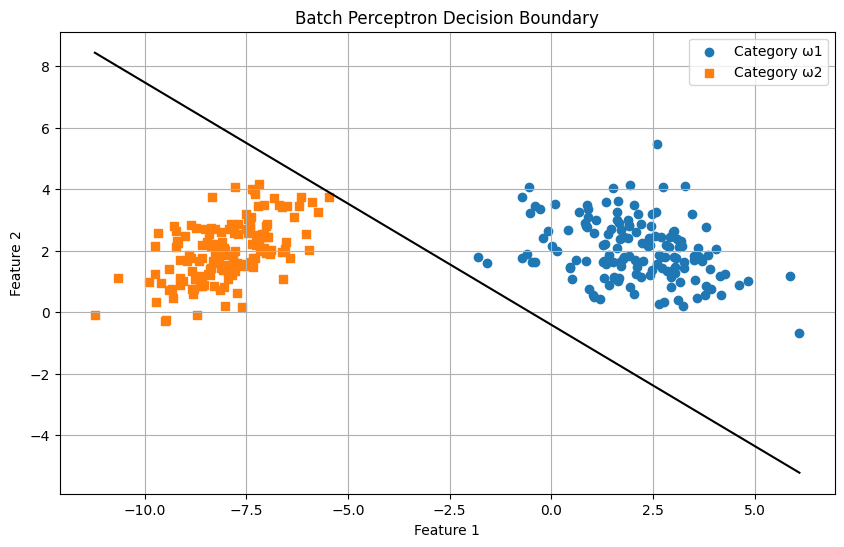

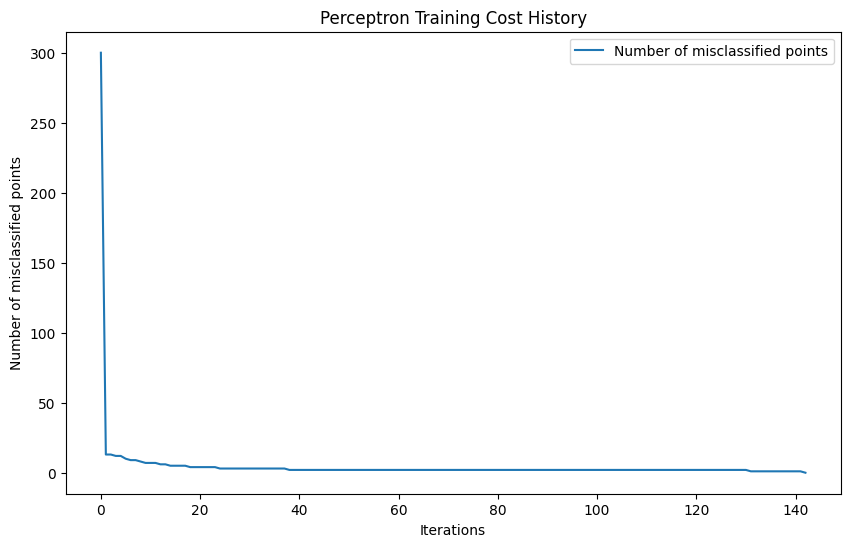

In [29]:

# Define the means and covariance matrices for ω1 and ω2
mu1 = np.array([2, 2])
sigma1 = np.array([[2, -0.5], [-0.5, 1]])
mu2 = np.array([-8, 2])
sigma2 = np.array([[1, 0.5], [0.5, 1]])

# Generate 150 random samples from each normal distribution
np.random.seed(42)
X1 = np.random.multivariate_normal(mu1, sigma1, 150)
X2 = np.random.multivariate_normal(mu2, sigma2, 150)

X = np.vstack((X1, X2))
y = np.hstack((-np.ones(len(X1)), np.ones(len(X2)))) #labeling : -1 for class1 , 1 for class 2

# Initialize variables
max_iter = 200
learning_rate = 0.1


# Run the batch perceptron algorithm and get the final weights and cost history
weights, iterations, misclassified, costs = batch_perceptron(X, y, learning_rate, max_iter)

# Print the values
print(f'Weights: {weights}')
print(f'Number of iterations: {iterations}')
print(f'Final number of misclassified points: {misclassified}')

# Decision boundary defined by the weights
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), len(X))
y_values = -(weights[0] + weights[2] * x_values) / weights[1]  # y = (-bias - w2*x) / w1

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], label='Category ω1', marker='o')
plt.scatter(X2[:, 0], X2[:, 1], label='Category ω2', marker='s')
plt.plot(x_values, y_values, 'k-')  # Plotting the decision boundary
plt.title('Batch Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(costs, label='Number of misclassified points')
plt.xlabel('Iterations')
plt.ylabel('Number of misclassified points')
plt.title('Perceptron Training Cost History')
plt.legend()
plt.show()


Παρατηρούμε ότι ο αλγόριθμος έχει καταφέρει να κατηγοριοποιήσει σωστά όλα τα δείγματα μετά απο 143 επαναλήψεις.

---
*Σημείωση: Προτίμησα να αρχικοποιήσω τον πίνακα των βαρών με μηδενικά, για την συνολική αποτύπωση της διαδικασίας και την απεικόνηση της χειρότερης περίπτωσης. Δοκίμασα να τον αρχικοποιήσω και με random τιμές. Λόγω των τυχαίων αρχικών τιμών κάποια δείγματα ήταν ήδη σωστά ταξινομημένα πριν την χρήση του αλγορίθμου, και έτσι ο αλγόριθμος σύγκλινε πολύ γρηγορότερα.*

## **Eρώτημα Β**

Ο παρακάτω κώδικας υλοποιεί τον Support Vector Machine (SVM) για δυαδική ταξινόμηση χρησιμοποιώντας την βιβλιοθήκη scikit-learn , πάνω στα δεδομένα που παράξαμε στο προηγούμενο ερώτημα.Η μέθοδος decision_function χρησιμοποιείται για να υπολογίσει την τιμή της συνάρτησης απόφασης του SVM για κάθε σημείο στο πλέγμα του χώρου των χαρακτηριστικών.

Στο διάγραμμα του SVM , οι κύκλοι σηματοδοτούν τα support vectors. Αυτά εμφανίζονται να βρίσκονται πάνω στις διακεκομένες γραμμές ,που αναπαριστούν τα περιθώρια . Οι γραμμές αυτές είναι οι περιοχές όπου τα δεδομένα των δύο κατηγοριών είναι πιο δύσκολο να διαχωριστούν και οι τιμές στα support vectors βοηθούν το μοντέλο να καθορίσει πού να τοποθετηθεί το υπερεπίπεδο.

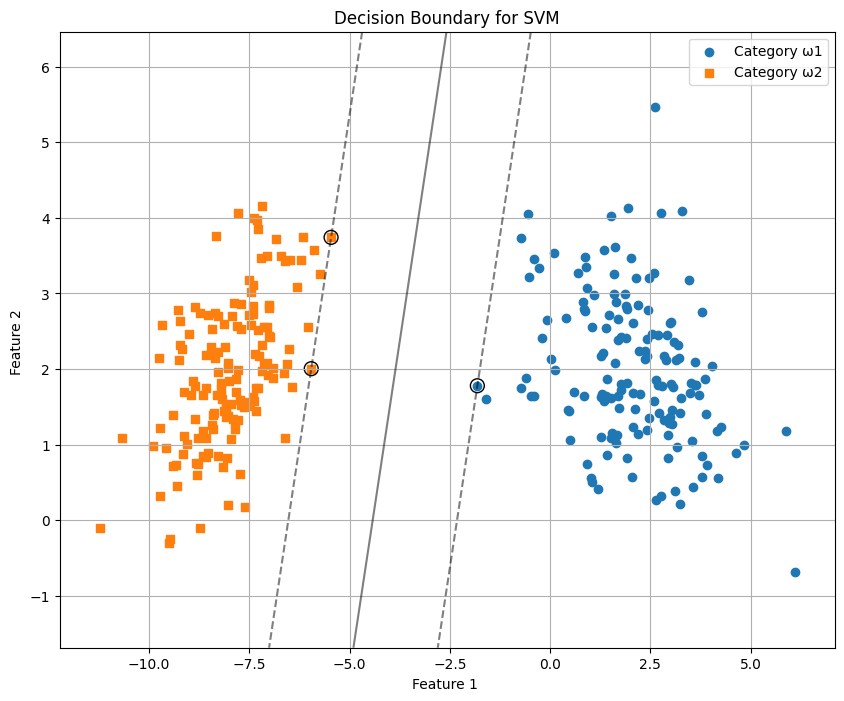

In [18]:

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X, y)

# Create a grid to evaluate the model
xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, len(X1))
yy = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, len(X2))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot data points and decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(X1[:, 0], X1[:, 1], label='Category ω1', marker='o')
plt.scatter(X2[:, 0], X2[:, 1], label='Category ω2', marker='s')

# Plot decision boundary and margins
contour = plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k')

# Label axes and show plot
plt.xlabel('Feature 1 ')
plt.ylabel('Feature 2 ')
plt.title('Decision Boundary for SVM')
plt.legend()
plt.grid(True)
plt.show()




**Συγκρίνοντας τον Perceptron με τον SVM:**

Οι διαφορές στις τεχνικές οφείλονται κυρίως στον τρόπο που κάθε μοντέλο προσπαθεί να βρει τη βέλτιστη λύση. Ο Perceptron αγνοεί τα δείγματα που ταξινομούνται σωστά και εστιάζει στα λανθασμένα, ενώ ο SVM βελτιστοποιεί τη θέση της γραμμής απόφασης με βάση τα πιο κρίσιμα δείγματα, τα support vectors. Αυτό καθιστά το SVM πιο ισχυρό και ανθεκτικό στην υπερβολική προσαρμογή, ειδικά σε περίπλοκα και μη γραμμικά προβλήματα.

Συγκρίνοντας το διάγραμμα του Perceptron με το διάγραμμα του SVM, μπορούμε να δούμε ότι και τα δύο μοντέλα κατάφεραν να διαχωρίσουν τις δύο κατηγορίες δεδομένων.Ωστόσο, ο Perceptron προσπαθεί να βρει οποιαδήποτε γραμμή που διαχωρίζει τα δεδομένα καθώς συγκλίνει μόλις ταξινομήσει όλα τα δεδομένα σωστά, ενώ ο SVM διαθέτει relaxation , αφού δεν σταματά στην πρώωτη λύση, αλλά επιχειρεί να βρει την καλύτερη γραμμή που μεγιστοποιεί το περιθώριο ανάμεσα στις κλάσεις.

# **Άσκηση 3**


In [19]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
wine = fetch_ucirepo(id=109)

### **Ερώτημα Α**

Για την ενσωμάτωση του συνόλου δεδομένων χρησιμοποιούνται οι οδηγίες που δώθηκαν στον σύνδεσμο της βάσης. Μετατρέπουμε τα δεδομένα σε πιίνακες numpy, κρατάμε σύμφωνα με τις οδηγίες το υποσύνολο που ζητείται και δημιουργούμε τα σετ training validation και test.


In [20]:

# data as numpy arrays
X = wine.data.features.to_numpy() #features
y = wine.data.targets.to_numpy().ravel() #labels 1D
Data = np.column_stack((X, y)) #combined


#Keep the first 5 columns(5 first ingredients) of classes C2,C3(labels>1)
X_filtered = Data[Data[:,-1]>1][:,:5]
y_filtered = y[y>1]


#Training,Validation,Testing set
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered, y_filtered, test_size=0.5, stratify=y_filtered, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print the shapes for confirmation
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)

Training Set: (59, 5) (59,)
Validation Set: (30, 5) (30,)
Test Set: (30, 5) (30,)


Σε αυτό τον κώδικα, χρησιμοποιούμε την train_test_split για να διαχωρίσουμε τα δεδομένα. Η παράμετρος stratify διασφαλίζει ότι η αναλογία των κλάσεων διατηρείται σε κάθε υποσύνολο, και η random_state παρέχει επαναληψιμότητα σε κάθε εκτέλεση(random sheed).

## **Ερώτημα Β**

Για να εκπαιδεύσουμε έναν ταξινομητή SVM (Support Vector Machine) με γραμμικό πυρήνα για να διαχωρίζει τις κλάσεις C2,C3 και να ρυθμίσουμε την παράμετρο C, θα χρησιμοποιήσουμε το validation set για να βρούμε την καλύτερη τιμή για το C και στη συνέχεια θα αξιολογήσουμε τον ταξινομητή στο test set. H ύπαρξη
της σταθεράς C στους περιορισμούς καθορίζει το βάρος που
δίνουμε στην ύπαρξη λαθών


*   Δημιουργία και εκπαίδευση του ταξινομητή SVM με διάφορες τάξης μεγέθους του C στο validation set.
*   Εύρεση της καλύτερης τιμής του C με βάση την απόδοση στο validation set.
*   Εκπαίδευση του τελικού μοντέλου με την καλύτερη τιμή του C .
*   Αξιολόγηση του τελικού μοντέλου στο test set και υπολογισμός του σφάλματος ταξινόμησης.


Για την επίλυση της άσκηση δημιουργήθηκε η συνάρτηση SVM_C_evaluate η οποία παίρνει ως εισόδους τα δεδομένα που διαχωρίζουμε κάθε φορά και τον τύπο του παραθύρου Kernel , έτσι ώστε να προσαρμόζουμε τον τύπο του ταξονομητή (Linear,Non-Linear).








In [21]:
def SVM_C_evaluate(X_train,y_train,X_val,y_val,X_test,y_test,kernel_type):

    # Initialize variables for the best performance and the best C value
    best_accuracy = 0
    best_C = 0.01
    # Try different values for C
    for C in [0.01, 0.1, 1, 10, 100]:
        # Create and train the SVM
        svm = SVC(kernel='linear', C=C)
        svm.fit(X_train, y_train)

        # Evaluate on the validation set
        y_val_pred = svm.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)

        # Update the best performance and C value
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C

    # Train the final model with the best C value
    final_model = SVC(kernel=kernel_type, C=best_C)
    final_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_test_pred = final_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_error = 1 - test_accuracy


    # Print the best C value, the accuracy and the classification error on the test set
    print(f"Best C Value: {best_C}")
    print(f"Accuracy on Test Set: {test_accuracy:.2f}")
    print(f"Classification Error on Test Set: {classification_error:.2f}\n")
    return test_accuracy,classification_error

#Data splitted previously
test_accuracy,classification_error= SVM_C_evaluate(X_train,y_train,X_val,y_val,X_test,y_test,'linear')

Best C Value: 1
Accuracy on Test Set: 0.70
Classification Error on Test Set: 0.30



## **Ερώτημα Γ**

In [22]:
print("----Linear SVM----\n")


classification_errors = []

# Repeat the process for 5 different random splits of the data
for i in range(5):
    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_filtered, y_filtered, test_size=0.5, stratify=y_filtered, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=i)

    print(f"Random splitting,iteration number:{i+1}")
    # Evaluate the SVM
    test_accuracy, classification_error = SVM_C_evaluate(X_train, y_train, X_val, y_val, X_test, y_test,'linear')
    print("")
    # Store the classification error
    classification_errors.append(classification_error)

# Calculate mean and standard deviation of classification errors
mean_error = np.mean(classification_errors)
std_error = np.std(classification_errors)

print("Mean and Standard Deviation of Classification Error")
print(f"Mean: {mean_error:.2f}")
print(f"Standard Deviation: {std_error:.2f}")

----Linear SVM----

Random splitting,iteration number:1
Best C Value: 0.1
Accuracy on Test Set: 0.87
Classification Error on Test Set: 0.13


Random splitting,iteration number:2
Best C Value: 1
Accuracy on Test Set: 0.93
Classification Error on Test Set: 0.07


Random splitting,iteration number:3
Best C Value: 0.1
Accuracy on Test Set: 0.83
Classification Error on Test Set: 0.17


Random splitting,iteration number:4
Best C Value: 10
Accuracy on Test Set: 0.77
Classification Error on Test Set: 0.23


Random splitting,iteration number:5
Best C Value: 10
Accuracy on Test Set: 0.77
Classification Error on Test Set: 0.23


Mean and Standard Deviation of Classification Error
Mean: 0.17
Standard Deviation: 0.06


## **Ερώτημα Δ**

In [23]:
classification_errors = []

print("----Non Linear SVM----\n")

# Repeat the process for 5 different random splits
for i in range(5):
    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_filtered, y_filtered, test_size=0.5, stratify=y_filtered, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=i)

    print(f"Random splitting,iteration number:{i+1}")
    # Evaluate the SVM
    test_accuracy, classification_error = SVM_C_evaluate(X_train, y_train, X_val, y_val, X_test, y_test,'rbf')
    # Store the classification error
    classification_errors.append(classification_error)

# Calculate mean and standard deviation of classification errors
mean_error = np.mean(classification_errors)
std_error = np.std(classification_errors)

print("Mean and Standard Deviation of Classification Error using non-linear SVM")
print(f"Mean: {mean_error:.2f}")
print(f"Standard Deviation: {std_error:.2f}")

----Non Linear SVM----

Random splitting,iteration number:1
Best C Value: 0.1
Accuracy on Test Set: 0.60
Classification Error on Test Set: 0.40

Random splitting,iteration number:2
Best C Value: 1
Accuracy on Test Set: 0.60
Classification Error on Test Set: 0.40

Random splitting,iteration number:3
Best C Value: 0.1
Accuracy on Test Set: 0.60
Classification Error on Test Set: 0.40

Random splitting,iteration number:4
Best C Value: 10
Accuracy on Test Set: 0.70
Classification Error on Test Set: 0.30

Random splitting,iteration number:5
Best C Value: 10
Accuracy on Test Set: 0.80
Classification Error on Test Set: 0.20

Mean and Standard Deviation of Classification Error using non-linear SVM
Mean: 0.34
Standard Deviation: 0.08


### **Συμπεράσματα**

Συγκρίνοντας τις δύο μεθόδους, φαίνεται ότι ο γραμμικός SVM παρουσιάζει χαμηλότερο μέσο σφάλμα ταξινόμησης και τυπική απόκλιση σε σύγκριση με τον μη-γραμμικό SVM. Αυτό σημαίνει ότι ο γραμμικός SVM έχει κατά μέσο όρο καλύτερη απόδοση και είναι πιο σταθερός στις διάφορες επαναλήψεις του διαχωρισμού των δεδομένων.

Ο καλύτερος ταξινομητής για αυτό το πρόβλημα φαίνεται να είναι ο γραμμικός SVM, καθώς παρουσιάζει μικρότερο σφάλμα ταξινόμησης. Αυτό μπορεί να σημαίνει ότι το πρόβλημα ταξινόμησης των δεδομένων κρασιού είναι γραμμικά διαχωρίσιμο ή ότι η γραμμική σχέση είναι αρκετά ισχυρή, ώστε να μην ωφελούμαστε από την πολυπλοκότητα του μη-γραμμικού πυρήνα.

## **Ερώτημα Ε**

Ο παρακάτω κώδικας χρησιμοποιεί τον SVM ταξινομητή για να εκπαιδεύσει μοντέλα και να υπολογίσει το σφάλμα ταξινόμησης στην ταξινόμηση τριών κλάσεων, χρησιμοποιώντας τη μέθοδο οne-vs-one. Εκτελείται επίσης 5-fold cross-validation για να υπολογιστεί το μέσο σφάλμα ταξινόμησης, και ο πίνακας σύγχυσης για να κατανοηθεί πώς ο ταξινομητής αποδίδει σε κάθε κλάση.

Για την επίλυση του ερωτήματος δημιουργείται μία συνάρτηση η οποία θα πέρνει ως είσοδο τα χαρακτηριστικά και τις ετικέτες τους καθώς επίσης και την συνθήκη που προσδιορίζει αν θα χρησιμοποιηθούν μόνο τα πρώτα πέντε χαρακτηριστικά του πίνακα X. Αν ναι, περιορίζει τα δεδομένα σε αυτά τα χαρακτηριστικά.Εκτελεί 5-fold cross-validation χρησιμοποιώντας τον StratifiedKFold και υπολογίζει το μέσο σφάλμα ταξινόμησης από τα σκορ.Εκπαιδεύει το μοντέλοκαι επιστρέφει το μέσο σφάλμα ταξινόμησης και τον πίνακα σύγχυσης.

In [24]:
def classification(X, y, use_first_five_features=True):

    # Select the first five features if specified
    if use_first_five_features:
        X = X[:, :5]

    # Create an SVM classifier with the one-vs-one strategy
    svm = SVC(kernel='linear', C=1, decision_function_shape='ovo')

    # Perform 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(svm, X, y, cv=cv)
    mean_error = 1 - np.mean(scores)

    # Train the model on the entire dataset to get the confusion matrix
    svm.fit(X, y)
    y_pred = svm.predict(X)
    conf_matrix = confusion_matrix(y, y_pred)

    return mean_error, conf_matrix

# Assuming X and y are already defined and preprocessed
mean_error_first_five, conf_matrix_first_five = classification(X, y, use_first_five_features=True)
mean_error_all_features, conf_matrix_all_features = classification(X, y, use_first_five_features=False)

print(f"Mean classification error using the first five features:{mean_error_first_five:.2f}")
print(f"Confusion matrix using the first five features:\n {conf_matrix_first_five}\n")

print(f"Mean classification error using all features: {mean_error_all_features:.2f}")
print(f"Confusion matrix using all features:\n {conf_matrix_all_features}")


Mean classification error using the first five features:0.19
Confusion matrix using the first five features:
 [[54  0  5]
 [ 2 61  8]
 [ 4  8 36]]

Mean classification error using all features: 0.04
Confusion matrix using all features:
 [[59  0  0]
 [ 0 70  1]
 [ 0  0 48]]


**Συμπεράσματα**

Στα παραπάνω αποτελέσματα, βλέπουμε την επίδραση της χρήσης διαφορετικού αριθμού χαρακτηριστικών στην απόδοση ενός γραμμικού SVM ταξινομητή:



1.   Χρησιμοποιώντας μόνο τα 5 πρώτα χαρακτηριστικά:


  *   Μέσο σφάλμα ταξινόμησης: 0.19
  *   Πίνακας σύγχυσης:

      Τα πραγματικά δεδομένα της κλάσης 1 προβλέπονται σωστά 54 φορές και 5 φορές ως κλάση 3.

      Τα πραγματικά δεδομένα της κλάσης 2 προβλέπονται σωστά 61 φορές 2 φορές ως κλάση 1 και 8 φορές ως κλάση 3.

      Τα πραγματικά δεδομένα της κλάσης 3 προβλέπονται σωστά 36 φορές 4 φορές ως κλάση 1 και 8 φορές ως κλάση 2

      Βάσει της παραπάνω περιγραφής των πινάκων σύγχυσης (confusion matrix) για το γραμμικό SVM που χρησιμοποιεί τα πρώτα πέντε χαρακτηριστικά, φαίνεται ότι το μοντέλο έχει μια δυσκολία στο να διαχωρίσει τις κλάσεις 1 με 3, καθώς και τις κλάσεις 2 με 3. Αυτό υποδηλώνει ότι τα χαρακτηριστικά της κλάσης 3 μπορεί να έχουν ομοιότητες με τις άλλες δύο κλάσεις που προκαλούν τη σύγχυση, δηλαδή τα χαρακτηριστικά τους υπερκαλύπτονται στον πενταδιάστατο χώρο.


2.   Χρησιμοποιώντας όλα τα διαθέσιμα χαρακτηριστικά:

*   Μέσο σφάλμα ταξινόμησης: 0.04
*   Πίνακας σύγχυσης:
    Ο ταξινομητής προβλέπει τέλεια τις κλάσεις 1 και 2 χωρίς κανένα λάθος.
    Η κλάση 3 προβλέπεται σχεδόν τέλεια με μόνο ένα λάθος ταξινομημένο χαρακτηριστικό που αποδίδεται στη κλαάση 2.


  Με τη χρήση όλων των διαθέσιμων χαρακτηριστικών, η απόδοση του μοντέλου βελτιώνεται δραματικά, δείχνοντας ότι τα επιπλέον χαρακτηριστικά παρέχουν πολύτιμη πληροφορία που βοηθά τον ταξινομητή να διακρίνει καλύτερα τα χαρακτηριστικά μεταξύ των κλάσεων.
